In [2]:
import pandas as pd
import numpy
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
# Display array values to 6 digits of precision
numpy.set_printoptions(precision=6, suppress=True)

In [11]:
from pathlib import Path
home = str(Path.home())
home
A = pd.read_csv("C:/Users/user/Dropbox/Github/TDALab/data/nsource.csv")

In [14]:
A.columns

Index(['valine_d8', 'phenylalanine_d8', '__methyladenosine', '__methylguanine',
       '__methylguanosine', '__methylhistamine', '__methylnicotinamide',
       '__deoxyuridine', '__o_methylguanosine', '__methylhistidine',
       ...
       'taurodeoxycholic_acid___tauroche', 'udp_glcnac',
       'udp_glucose____galactose', 'uracil', 'age', 'male', 'BMI',
       'IncidentStoke_Hx', 'incidentCHD_Hx', 'HbA1c'],
      dtype='object', length=2061)

In [15]:
feature_names = [c for c in A.columns if c not in ["id", "age", "male", "BMI", "IncidentStoke_Hx", "incidentCHD_Hx", "HbA1c"]]
X = numpy.array(A[feature_names].fillna(0))
Alt_headers = ["age", "male", "BMI", "IncidentStoke_Hx", "incidentCHD_Hx", "HbA1c"]
y = numpy.array(A[Alt_headers])

https://matthew-brett.github.io/teaching/pca_introduction.html

In [16]:
#----Normal Data set creation----------------------
#Normal people
X_normal = X[numpy.where((y[:,3] == 0) & (y[:,4] == 0) & (y[:,5] < 6))]
X_diabetes = X[numpy.where(y[:,5]>7)]

In [17]:
X_normal.shape

(741, 2055)

In [18]:
X_diabetes.shape

(173, 2055)

Method one: Feature selection to genes

In [29]:
U, s, V = numpy.linalg.svd(X_normal, full_matrices=False)

In [30]:
U.shape

(741, 741)

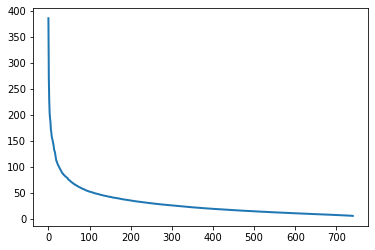

In [31]:
plt.plot(range(0,len(s)), s, linewidth=2.0)
#plt.axis([0, 1400, 0, 10])
plt.show()


Variance explained in first $k$ vectors
Use $$V_{k}=\frac{\sum_{i=1}^{k}\lambda_{i}^{2}}{\sum_{i=1}^{N}\lambda_{i}^{2}}$$

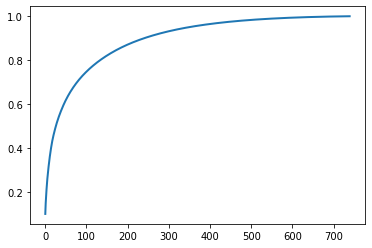

In [32]:
varAccountedFor = []
for i in range(1,len(s)):
    varAccountedFor.append(numpy.sum(numpy.square(s[0:i]))/numpy.sum(numpy.square(s[0:])))
plt.plot(range(0,len(varAccountedFor)), varAccountedFor, linewidth=2.0)
plt.show()

In [41]:
def N_hat(U,s,V,l):
    ''' returns the dimension reduced array '''
    s[l:]=0
    S=numpy.diag(s)
    N=numpy.matmul(U,numpy.matmul(S,V))
    return N

#rank of N_hat is reduced to l i.e. L
 #========Finding the basis of the matrix

def basis(N,l,method='QR'):
    ''' The numpy matrix returned after N_hat'''
    if method != 'QR':
        return scipy.linalg.orth(N)
    else:
        q,r=numpy.linalg.qr(N) # QR decomposition, by means of the Gram–Schmidt process, q: basis,
        return q[:,:l]   # r: right upper matrix which element are magnitute of column vectors of N matrix on new coordinates.

In [42]:
#choose l based on the plot (the x-axis value)
l=int(input("Give in the value of l= "))
N_new=N_hat(U,s,V,l)     # approximation with all the other vectors.


Give in the value of l= 200


In [43]:
N_new.shape

(741, 2055)

In [44]:
N_b=basis(N_new,l)
N_b.shape

(741, 200)

 The difference of basis between svd and gram–schmidt, The first vector in svd basis is the direction of vector with largest magnitude. The first vector in Gram-Schmidt is the first vector of the original matrix. 

In [66]:
numpy.sum(numpy.square(N_b[:,0]))

0.07286049036599129

In [28]:
sum(numpy.square(U[:,0]))

1.0000000000000009

In [29]:
U_try, s_try, V_try = numpy.linalg.svd(N_new, full_matrices=False)

In [35]:
N_new[:,0]/numpy.sqrt(numpy.sum(numpy.square(N_new[:,0])))

array([-0.016039, -0.03418 , -0.002881, -0.010617, -0.042715,  0.051176,
        0.046643,  0.008951,  0.015571,  0.029791, -0.027404, -0.027589,
        0.019826,  0.013722,  0.00229 ,  0.000358, -0.002322, -0.04175 ,
       -0.051284,  0.025463,  0.00897 , -0.045902,  0.033068, -0.009518,
        0.021267, -0.031097,  0.115184,  0.043709,  0.00932 , -0.05884 ,
       -0.031632, -0.015451,  0.030757, -0.012694,  0.035435,  0.026127,
        0.064447,  0.050213, -0.007891, -0.045826, -0.00069 ,  0.004184,
        0.024476, -0.005108,  0.018124, -0.002191,  0.007924,  0.022611,
        0.055564, -0.029226,  0.018378,  0.005669, -0.051779, -0.00027 ,
       -0.060515, -0.005135, -0.026245,  0.067947,  0.069805, -0.030062,
       -0.036169,  0.029674,  0.000839, -0.072271,  0.026247,  0.013862,
        0.004462, -0.010137, -0.027021, -0.003514,  0.048069, -0.008905,
       -0.040792,  0.071937, -0.003994,  0.024809,  0.057909,  0.050065,
        0.10664 ,  0.03069 , -0.006995, -0.00861 , 

In [51]:
N_b[:,0].shape

(741,)

In [55]:
N_p = numpy.matmul(X_normal_T,V.transpose())

In [56]:
N_p.shape

(741, 741)

In [57]:
numpy.sum(numpy.square(N_p[:,200:]),axis=0)

array([1226.62342699, 1220.01011676, 1211.90978412, 1205.36719649,
       1187.41643427, 1179.67870831, 1171.46614121, 1166.57238434,
       1163.3523569 , 1149.54801592, 1146.99305333, 1140.30173198,
       1125.05128109, 1116.59898486, 1109.63999203, 1103.28503462,
       1094.49147697, 1090.72084266, 1089.47137043, 1078.8854439 ,
       1075.21811336, 1063.91476318, 1051.29135494, 1047.017262  ,
       1043.88871384, 1031.90222053, 1024.13370252, 1019.96748084,
       1015.51996124, 1002.98198282,  999.24908973,  995.60891992,
        984.4396597 ,  979.87931666,  975.64377216,  969.95719561,
        966.01896211,  963.33976699,  953.46586533,  948.13408992,
        939.37567862,  938.06826596,  927.92748238,  924.51507884,
        918.49320971,  911.69689136,  905.78785571,  898.5776666 ,
        893.99672119,  888.86839416,  887.8407143 ,  882.58977852,
        876.21235532,  871.60717419,  864.95048494,  858.75631694,
        851.07984221,  841.67274615,  837.43601927,  833.17754

Method Two: Feature selection to Patients

In [25]:
U_p, s_p, V_p = numpy.linalg.svd(X_normal, full_matrices=False)

In [26]:
U_p.shape

(741, 741)

In [94]:
def project(A,v):
    ''' A is a numpy array of basis of the subspace, output of basis
    v is the column of A(orginal matrix)
    Vn is the projected data on N_l space
    and V_np is the projected data perpendicular to it'''
    P_2=numpy.linalg.inv(numpy.matmul(A.transpose(),A))
    P=numpy.matmul(numpy.matmul(A,P_2),A.transpose())
    Vn=numpy.dot(P,v)
    V_np=v-Vn
    return (Vn,V_np)

In [43]:
U.shape

(741, 741)

(1, 2)

In [102]:
(p,q) = X_normal.shape

N_c=[]
D_c=[]
for i in range(q):
    pp=X_normal[i,:]
    (V_n,V_np)=project(N_b,pp)
    N_c.append(V_n)
    D_c.append(V_np)
N_c=numpy.stack(N_c,axis=1)
D_c=numpy.stack(D_c,axis=1)

ValueError: shapes (741,741) and (2055,) not aligned: 741 (dim 1) != 2055 (dim 0)

2055


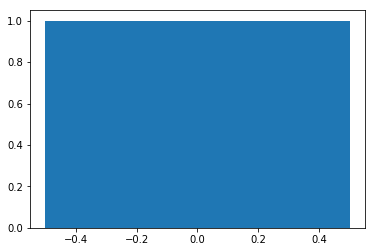

In [105]:
N_Dc_dist = numpy.sum(numpy.square(D_c),axis=0)
plt.hist(N_Dc_dist, bins='auto');

In [63]:
#================ Normal data projection to Checking ==============
(p1,q1) = X_diabetes.shape

Diab_Nc=[]
Diab_Dc=[]
for i in range(p1):
    p_diat,X_diabetes_T_new=drop(X_diabetes,i)
    (V_n,V_np)=project(N_b,p_diat)
#    Diab_Nc.append(V_n)
#    Diab_Dc.append(V_np)
#Diab_Nc=numpy.stack(Diab_Nc,axis=1)
#Diab_Dc=numpy.stack(Diab_Dc,axis=1)

ValueError: shapes (741,741) and (173,) not aligned: 741 (dim 1) != 173 (dim 0)

In [64]:
Diat_dist = numpy.sum(numpy.square(Diab_Dc),axis=0)

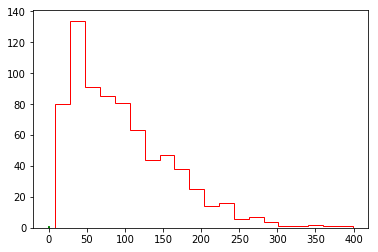

In [65]:
fig, ax = plt.subplots()
ax.hist(N_Dc_dist, bins='auto', ec='red', histtype='step')
ax.hist(Diat_dist, bins='auto', ec='green', histtype='step')
#ax.legend(loc='upper left')
plt.show()

$$W(l)\approx\left(\frac{\lambda_{l}^{2}}{\lambda_{l+1}^{2}+\cdots+\lambda_{R}^{2}}\right)\frac{(n-l-1)(R-l)}{n+R-2l}$$
Recall that $\lambda_{i}$ essentially gives a
measure of the amount of data in the $i_{th}$ direction, so that
roughly, Wold’s invariant $W(l)$ measures the ratio between the
smallest signal $\lambda_{l}$ and all noise (the subsequent singular values
$\lambda_{l+1}, \cdots, \lambda_{r}$.). We take $L$ so that $W(l)$ spikes up for the value $L$

In [312]:
def wold(s,l,R,n):
   ''' s is the matrix containing singular values in descending order
   l is the dimension we wish to reduce to; not indices
   R is the orginal dimension; not indices, i.e. the number of normal samples
   n is the number of rows or genes'''
   c=(n-l-1)*(R-l)/(n+R-2*l)
   l = l-1 #makes it as index
   R = R-1 #makes it as index
   w_1 = (s[l])**2/numpy.sum(numpy.square(s[l+1:]))
   return w_1*c

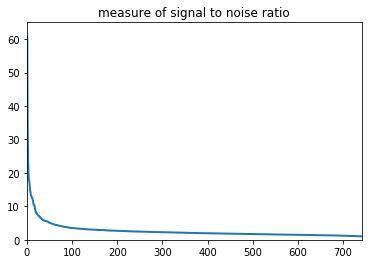

[60.736732126722586,
 31.47956546629699,
 22.952611305999188,
 19.1155335570108,
 17.750700412557403,
 17.1132341910641,
 14.853028653659035,
 14.406383341713385,
 13.339951297574904,
 13.004965861292048]

In [332]:
dim = X_normal_T.shape
r = dim[1]
gamma = dim[0]

wold_cost = []
for i in range(1,r):
    wold_cost.append(wold(s,i,r,gamma))
wold_cost
plt.plot(range(1,r), wold_cost, linewidth=2.0)
plt.title('measure of signal to noise ratio')
plt.axis([0, r, 0, 65])
plt.show()
wold_cost[0:10]

In [495]:
def DIC(s,l,n):
   ''' s is the matrix containing singular values in descending order
   l is the dimension we wish to reduce to; not indices
   R is the orginal dimension; not indices, i.e. the number of normal samples
   n is the number of rows or genes'''

   V_1 = numpy.sum(numpy.square(s[0:l]))/numpy.sum(numpy.square(s[0:]))
   c = l*numpy.log(n) - 200*V_1
   return V_1*c

In [496]:
dim = X_normal_T.shape
r = dim[1]


print(DIC(s,r,r))

4696.5284633444


In [497]:
s[0:1]

array([385.15498051])

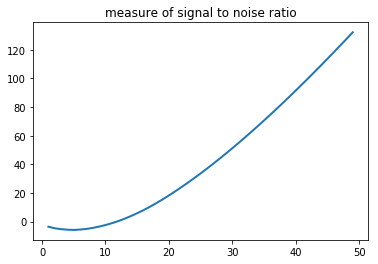

In [498]:
dim = X_normal_T.shape
r = dim[1]
gamma = dim[0]

drew_cost = []
for i in range(1,r):
    drew_cost.append(DIC(s,i,r))
#drew_cost
plt.plot(range(1,50), drew_cost[1:50], linewidth=2.0)
plt.title('measure of signal to noise ratio')
#plt.axis([0, r, 0, 65])
plt.show()
#drew_cost[0:20]


In [22]:
#----------FLAT Reconstruction---------------
def drop(A,ind):
    ''' A is a numpy matrix 
        ind is the index of the column to be removed'''
    p=A[:,ind]                   # removed column
    A_1=A[:,0:ind]
    A_2=A[:,ind+1:A.shape[1]]
    A_new=numpy.hstack((A_1,A_2))    # left columns
    return (p,A_new)

def flat(A,ind):
    B=drop(A,ind)
    X=B[1]
    y=B[0]
    reg = linear_model.LinearRegression(fit_intercept=False)
    reg.fit(X,y)
    #print(X.shape)
    #print(reg.coef_.shape)
    return numpy.dot(X,reg.coef_)

In [401]:
N=[]
for i in range(r):
    N_i=flat(X_normal_T,i)
    N.append(N_i)
N=numpy.stack(N,axis=1)

In [402]:
N.shape

(2055, 741)

In [403]:
U, s, V = numpy.linalg.svd(N, full_matrices=False)

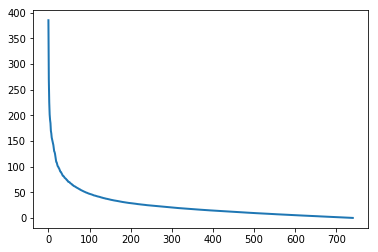

In [404]:
plt.plot(range(0,r), s, linewidth=2.0)
#plt.axis([0, 1400, 0, 10])
plt.show()

In [301]:
def wold(s,l,r,gamma):
   ''' s is the matrix containing singular values in descending order
   l is the dimension we wish to reduce to not indices
   r is the orginal dimension not indices, i.e. the number of normal samples
   gamma is the number of rows or genes'''
   c=(gamma-l-1)*(r-l)/(gamma+r-2*l)
   l = l-1 #makes it as index
   r = r-1 #makes it as index
   w_1 = (s[l])**2/numpy.sum(numpy.square(s[l+1:]))
   return w_1*c

def N_hat(U,s,V,l):
    ''' returns the dimension reduced array '''
    s[l:]=0
    S=numpy.diag(s)
    N=numpy.matmul(U,numpy.matmul(S,V))
    return N

#rank of N_hat is reduced to l i.e. L
 #========Finding the basis of the matrix

def basis(N,l,method='QR'):
    ''' The numpy matrix returned after N_hat'''
    if method != 'QR':
        return scipy.linalg.orth(N)
    else:
        q,r=numpy.linalg.qr(N) # QR decomposition, by means of the Gram–Schmidt process, q: basis, 
        return q[:,:l]   # r: right upper matrix which element are magnitute of column vectors of N matrix on new coordinates.

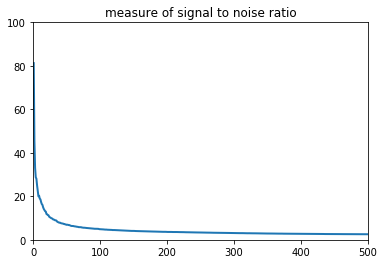

[45.4148305234822,
 33.17868723298128,
 28.742126918077883,
 28.090122176553823,
 24.95514855455895,
 22.466772435566405,
 20.013722006000975,
 20.247114164101575,
 18.92280091145272]

In [228]:
U, s, V = numpy.linalg.svd(N, full_matrices=False)
wold_cost = []
for i in range(1,r):
    wold_cost.append(wold(s,i,r,gamma))
wold_cost
plt.plot(range(1,r), wold_cost, linewidth=2.0)
plt.title('measure of signal to noise ratio')
plt.axis([0, 500, 0, 100])
plt.show()
wold_cost[1:10]

In [232]:
plt.plot(range(0,r), nln(s)/r, linewidth=2.0)
#plt.axis([0, 1400, 0, 10])
plt.show()

NameError: name 'ln' is not defined

In [148]:
#choose l based on the plot (the x-axis value)
l=int(input("Give in the value of l "))
N_new=N_hat(U,s,V,l)     # approximation with all the other vectors.
N_b=basis(N_new,l)

Give in the value of l 200


In [162]:
N_new.shape

(2072, 1354)

In [170]:
N_b.shape

(2072, 200)

In [69]:
B=numpy.random.random((10,10))*100 #Diseased people
(p,q)=B.shape
B

array([[45.05094465,  9.71820153, 97.48342575, 79.69559674, 12.29154316,
        83.57097711, 78.95921804, 60.37680122, 79.69383209, 77.58392612],
       [72.09429453, 39.36039431, 80.5957243 ,  9.85560479, 70.52063096,
        62.87132124, 55.6359282 , 86.92554231, 95.20363231, 28.09344202],
       [25.87845123, 91.01243121, 62.06044604,  9.54343621, 57.4290457 ,
        27.87708346, 16.6855426 , 97.54581989, 83.4652987 , 23.72127679],
       [26.69488808, 78.53719038, 95.94090351, 83.68105531, 17.72038106,
        13.87211883,  2.50448798, 69.54886599, 19.07771613, 13.41888504],
       [39.02406339, 28.76747194, 85.03595989, 86.89672282, 61.0707463 ,
        70.94716534, 23.4834346 , 48.00035939, 12.89472137, 53.75844672],
       [72.1025373 , 12.09237496, 92.93515193, 88.3542906 , 90.56548912,
        91.70173617, 39.58473455, 51.32525754, 86.80201406, 49.49500069],
       [24.46582501, 92.51257174, 51.75346742, 52.91093623, 46.80163434,
         3.80293383, 82.68179589, 14.43378415

In [22]:
list(range(q))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [55]:
drop(B,2)

(array([16.02672383, 34.86634414, 14.67250846, 11.76256843, 80.53346051,
        30.73796904, 59.77695835, 23.30752075, 66.1912662 , 16.04322102]),
 array([[61.42643223, 27.31752954, 66.92539778, 60.87977689, 67.85931902,
         96.19820985, 58.21397447, 82.04089685, 51.01138104],
        [58.62322366, 76.43498777, 67.32404226, 50.82535874, 34.80286237,
         86.11247208,  5.33693289, 34.65178891, 15.8459606 ],
        [17.93747538, 86.37039753, 57.54747856, 15.9649214 , 59.33095203,
         68.34570422, 94.36437504, 84.54788225, 43.93871559],
        [31.09764845, 38.65115246, 65.00697349, 79.19769907, 30.77834134,
          1.18429669, 13.07424033, 53.99992808, 20.95311931],
        [76.3203676 , 52.61296947, 63.70431499, 71.09195042, 54.82113248,
         96.56975716, 58.07369288, 35.68528709, 95.3515894 ],
        [94.499966  , 69.81810023, 39.39046566, 47.91092044, 14.01227899,
         37.20532641, 82.96100715,  2.38011547, 50.37685199],
        [52.70935726, 60.75663471, 6

In [56]:
 p,B_new=drop(B,2)

In [25]:
p

array([67.58967287, 60.01809693, 58.59457551, 46.8989717 , 33.74144188,
       32.70726518, 24.75642654, 31.26888387, 72.27223758,  8.96458203])

In [26]:
B_new

array([[66.36403785, 94.34327747, 21.82052235,  4.21807655, 14.8202847 ,
        55.81732489, 34.30239548, 39.3744018 , 44.10736676],
       [54.13868865, 71.24684674, 58.93639599, 75.15946955, 95.34794489,
         2.9213864 , 66.71287893, 60.95764849, 95.55527309],
       [25.31833724, 64.71721936, 26.94397158, 64.76684698, 66.80022784,
        37.94035697, 63.89321766, 37.69374013, 38.30940123],
       [63.85747905, 38.42456294,  8.7968329 , 79.39876765, 97.26913667,
        53.2949542 , 98.37314481, 16.16142245, 28.41402675],
       [83.43877262, 84.5773416 , 38.81628341, 84.19323992, 35.44184376,
        33.09446487, 50.83908127, 20.30227585, 81.05296402],
       [45.08253645, 90.71203543, 11.78540658, 83.8837379 , 42.37887254,
        83.47042368, 22.80826301, 26.32965478, 64.42973304],
       [77.0647143 , 29.55485859, 11.78578549,  3.38415254, 38.2820342 ,
        38.33504507, 17.15861085, 60.71360929, 45.47507968],
       [ 3.76428012, 15.90556203, 76.1136368 , 78.32489369, 86

In [27]:
def project(A,v):
    ''' A is a numpy array of basis of the subspace, output of basis
    v is the column of A(orginal matrix)
    Vn is the projected data on N_l space
    and V_np is the projected data perpendicular to it'''
    P_2=numpy.linalg.inv(numpy.matmul(A.transpose(),A))
    P=numpy.matmul(numpy.matmul(A,P_2),A.transpose())
    Vn=numpy.dot(P,v)
    V_np=v-Vn
    return (Vn,V_np)

In [573]:
X_normal.shape

(741, 2055)

In [651]:
U_f, s_f, V_f = numpy.linalg.svd(X_normal, full_matrices=True)

In [586]:
V_f.shape

(741, 2055)

In [652]:
s_f.shape

(741,)

In [587]:
U_f.shape

(741, 741)

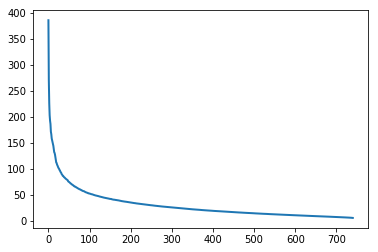

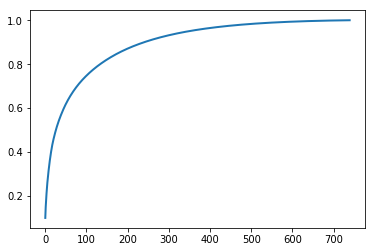

In [585]:
plt.plot(range(0,len(s_f)), s_f, linewidth=2.0)
#plt.axis([0, 1400, 0, 10])
plt.show()
varAccountedForFeature = []
for i in range(1,len(s_f)):
    varAccountedForFeature.append(numpy.sum(numpy.square(s_f[0:i]))/numpy.sum(numpy.square(s_f[0:])))
plt.plot(range(0,len(varAccountedForFeature)), varAccountedForFeature, linewidth=2.0)
plt.show()

In [644]:
#choose l based on the plot (the x-axis value)
ll=int(input("Give in the value of l "))
N_f_new=N_hat(U_f,s_f,V_f,ll)     # approximation with all the other vectors.


Give in the value of l 300


In [645]:
N_f_b=basis(N_f_new,ll)
N_f_b.shape

(741, 300)

In [648]:
#================ Normal data projection to Checking ==============
(p2,q2) = X_diabetes.shape

Diab_f_Nc=[]
Diab_f_Dc=[]
for i in range(q2):
    p_diat_f,X_diabetes_f_new=drop(X_diabetes,i)
    (V_n,V_np)=project(N_f_b,p_diat_f)
    Diab_f_Nc.append(V_n)
    Diab_f_Dc.append(V_np)
Diab_f_Nc=numpy.stack(Diab_f_Nc,axis=1)
Diab_f_Dc=numpy.stack(Diab_f_Dc,axis=1)

ValueError: shapes (741,741) and (173,) not aligned: 741 (dim 1) != 173 (dim 0)

In [650]:
X_diabetes.shape

(173, 2055)